<a href="https://colab.research.google.com/github/szakmarynandor/FAKT-MLCourse/blob/main/ora02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. óra

In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

In [46]:
dataframe = pd.read_csv(file_url)
dataframe.shape

(303, 14)

In [47]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


##Hiányzó értékek vizsgálata

In [48]:
dataframe.isna().sum() #nincs hiánzó adat egyik oszlopban sem

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##Szöveges kategorikus változó átalakítása

In [51]:
labeler = LabelEncoder()
labeler.fit(dataframe.thal)

LabelEncoder()

In [52]:
dataframe.thal = labeler.transform(dataframe.thal)
# egy lépésben
# dataframe.thal = labeler.fit_transform(...)

In [53]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [54]:
y_df = dataframe.target

In [55]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [56]:
x_df = dataframe.copy().drop('target', axis=1) #oszloponként történő törléshez axis=1 kell

In [57]:
x_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True) #10%-os teszt adatbázis

In [59]:
x_train.shape

(272, 13)

In [60]:
x_test.shape

(31, 13)

In [61]:
y_test.shape

(31,)

In [62]:
x_test.shape[0] == y_test.shape[0] #megyegyezik-e a teszt adatbázisok sorainak száma

True

##Normalizálás

In [63]:
normalizer = StandardScaler() #létrehozzuk a normalizálót

In [64]:
normalizer.fit(x_train) #betanítjuk a normalizásót

StandardScaler()

In [65]:
x_train = normalizer.transform(x_train) #alkalmazzuk a normalizálót

In [66]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.162323,0.679975,0.883194,-0.676872,-1.340576,-0.427327,-1.047232,-0.404787,-0.703211,-0.539974,-0.954323,-0.729669,1.112272
1,-2.332936,-1.470643,-1.054135,-0.786526,-0.708125,-0.427327,-1.047232,1.859970,-0.703211,-0.282152,-0.954323,-0.729669,-0.480033
2,-1.656434,0.679975,0.883194,1.077594,-0.458978,-0.427327,-1.047232,1.380887,-0.703211,-0.883738,-0.954323,-0.729669,1.112272
3,2.402575,-1.470643,-0.085470,0.419669,-0.957272,-0.427327,-0.033541,-1.450059,-0.703211,0.061612,0.678229,-0.729669,-0.480033
4,-1.994685,-1.470643,-0.085470,-0.676872,-0.612299,-0.427327,-1.047232,0.901804,-0.703211,-0.883738,-0.954323,-0.729669,-0.480033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.598571,-1.470643,-2.022800,0.967939,-0.133170,-0.427327,-1.047232,0.945357,-0.703211,-0.110270,-0.954323,-0.729669,-0.480033
268,0.598571,-1.470643,-0.085470,-0.676872,-1.321411,2.340126,-1.047232,-2.321120,-0.703211,-0.883738,-0.954323,-0.729669,-0.480033
269,-0.416181,-1.470643,-0.085470,-0.676872,0.920915,-0.427327,0.980150,0.335614,-0.703211,-0.368093,-0.954323,-0.729669,-0.480033
270,-1.205433,-1.470643,-0.085470,-0.786526,-0.094839,-0.427327,-1.047232,-0.012810,-0.703211,-0.625915,0.678229,0.326023,-0.480033


In [67]:
x_test = normalizer.transform(x_test) #a train adatbázis átlagával és szórásával normalizáljuk a test adatbázist is

##Architektúra létrehozása

In [95]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [96]:
input = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [97]:
model = keras.Model(input, output)

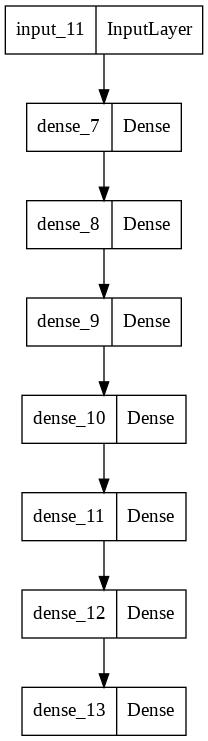

In [98]:
plot_model(model)

In [99]:
model.compile(loss='binary_crossentropy', metrics=[BinaryAccuracy()])

In [100]:
model.fit(x=x_train, y=y_train, epochs=20) #50-szer végigmegy a tejes adatbázison

Epoch 1/20
9/9 [==============================] - 1s 3ms/step - loss: 0.5960 - binary_accuracy: 0.6728
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.4451 - binary_accuracy: 0.7500
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.3693 - binary_accuracy: 0.8272
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 0.3298 - binary_accuracy: 0.8346
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2927 - binary_accuracy: 0.8676
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2700 - binary_accuracy: 0.8640
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2593 - binary_accuracy: 0.8824
Epoch 8/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2451 - binary_accuracy: 0.8824
Epoch 9/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2268 - binary_accuracy: 0.8897
Epoch 10/20
9/9 [==============================] - 0s 3ms/step - loss: 0.

In [101]:
model.predict(x_test)

array([[2.8065145e-13],
       [3.8306186e-01],
       [4.9996106e-07],
       [8.4665972e-01],
       [1.2471909e-06],
       [3.0869313e-07],
       [9.3673009e-01],
       [5.3563723e-05],
       [1.4937863e-01],
       [7.2429661e-06],
       [3.8425080e-10],
       [9.2417741e-01],
       [3.7332475e-03],
       [9.5135295e-01],
       [9.8744643e-01],
       [1.0008758e-04],
       [2.7604312e-07],
       [8.2598162e-01],
       [1.8483232e-11],
       [1.9067526e-04],
       [2.9485225e-12],
       [1.3457861e-07],
       [2.7981400e-03],
       [2.0116854e-11],
       [3.1376807e-08],
       [7.7670813e-04],
       [4.9334764e-04],
       [9.7396958e-01],
       [1.2282156e-08],
       [8.6936024e-07],
       [1.3379988e-01]], dtype=float32)

In [102]:
model.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.9687 - binary_accuracy: 0.8387


[0.9687392711639404, 0.8387096524238586]